![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Supervised Learning Project Part A
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support,log_loss,mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# Part A 

# DOMAIN: Medical

## CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

## DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

## PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

### STEPS AND TASK 
### 1. Data Understanding: 
###### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.
###### B. Print Shape and columns of all the 3 DataFrames. 
###### C. Compare Column names of all the 3 DataFrames and clearly write observations.
###### D. Print DataTypes of all the 3 DataFrames. 
###### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. 
### 2. Data Preparation and Exploration: 
###### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 
   For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’
###### B. Combine all the 3 DataFrames to form a single DataFrame 
Checkpoint: Expected Output shape = (310,7)
###### C. Print 5 random samples of this DataFrame 
###### D. Print Feature-wise percentage of Null values. 
###### E. Check 5-point summary of the new DataFrame. 
### 3. Data Analysis:
###### A. Visualize a heatmap to understand correlation between all features 
###### B. Share insights on correlation. 
###### A. Features having stronger correlation with correlation value.
###### B. Features having weaker correlation with correlation value.
###### C. Visualize a pairplot with 3 classes distinguished by colors and share insights. 
###### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. 
###### E. Visualize a boxplot to check distribution of the features and share insights. 
### 4. Model Building: 
###### A. Split data into X and Y. 
###### B. Split data into train and test with 80:20 proportion. 
###### C. Train a Supervised Learning Classification base model using KNN classifier. 
###### D. Print all the possible performance metrics for both train and test data. 
### 5. Performance Improvement: 
###### A. Experiment with various parameters to improve performance of the base model. 
(Optional: Experiment with various Hyperparameters - Research required)
###### B. Clearly showcase improvement in performance achieved. 
For Example:
###### A. Accuracy: +15% improvement
###### B. Precision: +10% improvement.
###### C. Clearly state which parameters contributed most to improve model performance.

### Reading all three csv files and storing them in saperate variables

In [17]:
df1 = pd.read_csv('Normal.csv')
df2 = pd.read_csv('Type_H.csv')
df3 = pd.read_csv('Type_S.csv')

### shape and size of each dataframe

In [18]:
print("Size and shape of each dataframes:")
print("df1.csv : {}".format(df1.shape))
print("df2.csv : {}".format(df2.shape))
print("df3.csv : {}".format(df3.shape))

Size and shape of each dataframes:
df1.csv : (100, 7)
df2.csv : (60, 7)
df3.csv : (150, 7)


### data types of all three dataframe

In [19]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [20]:
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [21]:
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


***It is clear that that there are 3 different classes in 3 csv files. all files consistes of similar features and datatypes, so we can go ahead and combine the dataframes for further analysis***

### combining all thre datasets

In [25]:
df=pd.concat([df1,df2,df3], ignore_index= True)

In [26]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


***After merging the files we get the cumulative numbers of rows and columns from all 3 files***

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [28]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

***Classes are mentioned in different format or type or tp_s in the class fields, Lets us consider Normal, Type_H & Type_S as 3 different classes and rename the errors accordingly***

### Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [29]:
cl_type={'Nrmal':'Normal','type_h':'Type_H','tp_s':'Type_S','Normal':'Normal','Type_S':'Type_S','Type_H':'Type_H'}
df['Class']=df['Class'].apply(lambda x: cl_type[x])

In [30]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [31]:
df['Class']=df['Class'].astype('category')

In [32]:
df['Class'].nunique()

3

### checking null values

In [33]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [34]:
df. isnull(). sum() * 100 / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

### 5 random samples of this DataFrame

In [35]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,Normal
24,37.731992,9.386298,42.000000,28.345694,135.740926,13.683047,Normal
170,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Type_S
175,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Type_S
179,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,Type_S


### 5-point summary of the new DataFrame

In [36]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [37]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [38]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
S_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310,3,Type_S,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### heatmap to understand correlation between all features

In [39]:
df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


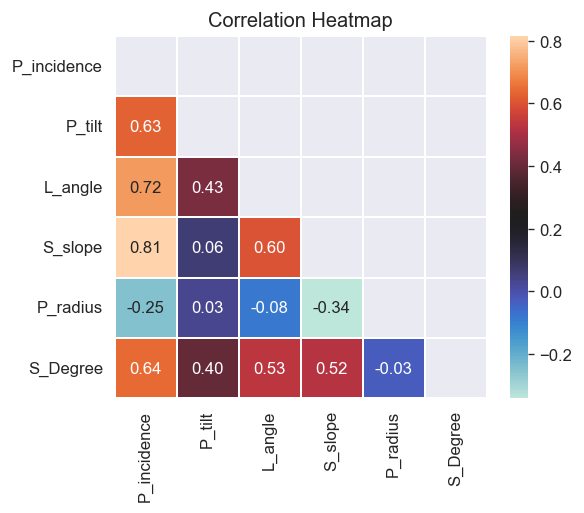

In [40]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap='icefire')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Observations:

- P_incidence and S_slope are highly correlated with r = 0.81 
- P_incidence and L_angle are correlated with r = 0.72
- P_incidence and S_Degree are mildly correlated with r = 0.64
- P_incidence and P_tilt are mildly correlated with r = 0.63
- S_slope and L_angle are mildly correlated with r = 0.6
**Correlation between s_degree and p_incidence have high correlation.**
**S_degree and p_radius has negative correlation**

### Distribution of Target Variable

### pairplot with 3 classes distinguished by colors and sharing insights

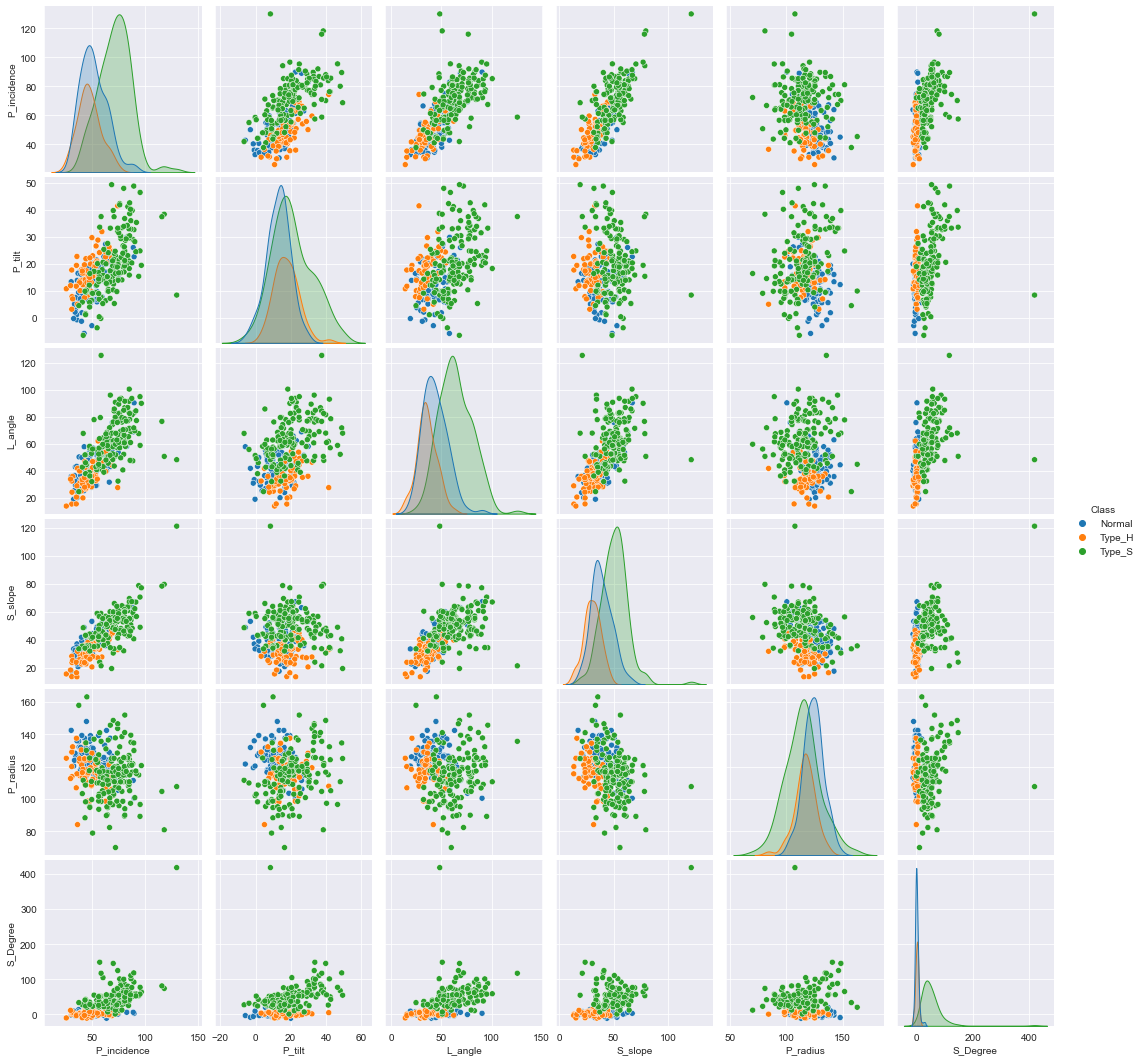

In [41]:
sns.pairplot(df,hue='Class')
plt.show()

> **Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well**

> **It is evident that type_s class is more compared to other two**

> **Normal class has higher values compared to Type_H**

### jointplot for ‘P_incidence’ and ‘S_slope’ and sharing insights

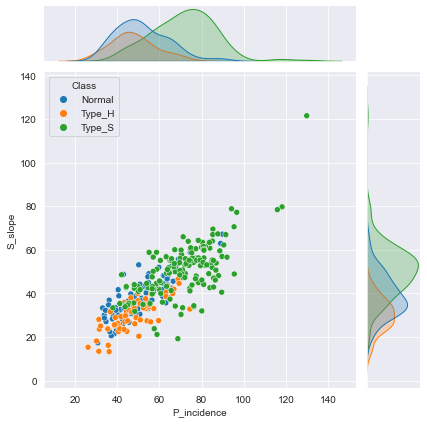

In [42]:
sns.jointplot(data=df,x='P_incidence',y='S_slope',hue='Class')
plt.show()

> **as p_incidence and S_slope increases the class is more likey to be type_s**

> **lower the value of both class is more likely to be type_h**

> **and similar values of p_incidence and s_slope the class is more likely to be Normal**

 # **Bi Variate Analysis**

### boxplot to check distribution of the features and sharing insights

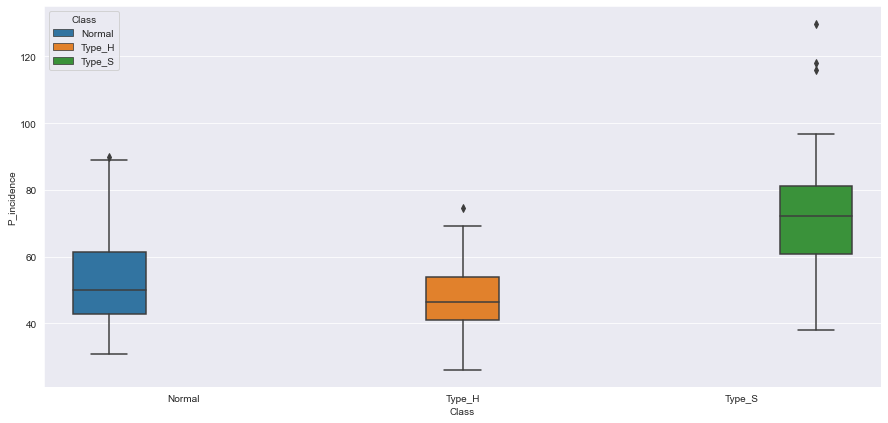

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df,hue='Class')
plt.show()

> **P_Incidence Value is larger for Type_S Class. We can see some extreme values as well**

> **Normal Value is slightly higher than Type_H**

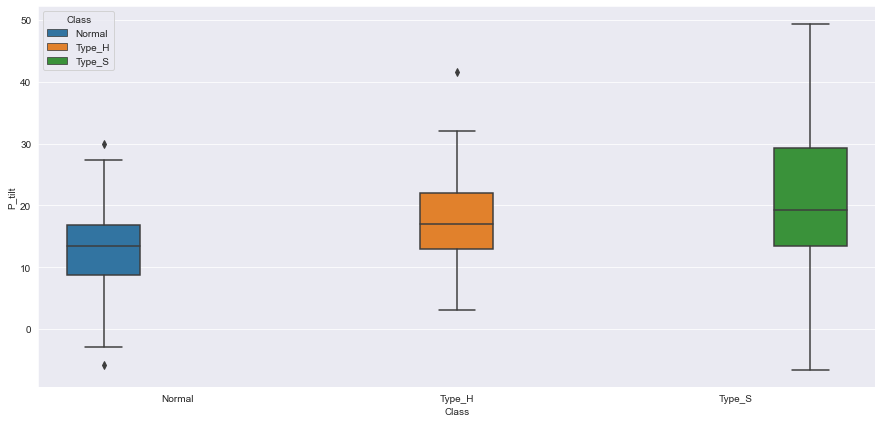

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_tilt', data= df,hue='Class')
plt.show()

> **Mean of Type_S is slightly higher than rest two**

> **Few cases Normal and Type_H also has huge values**

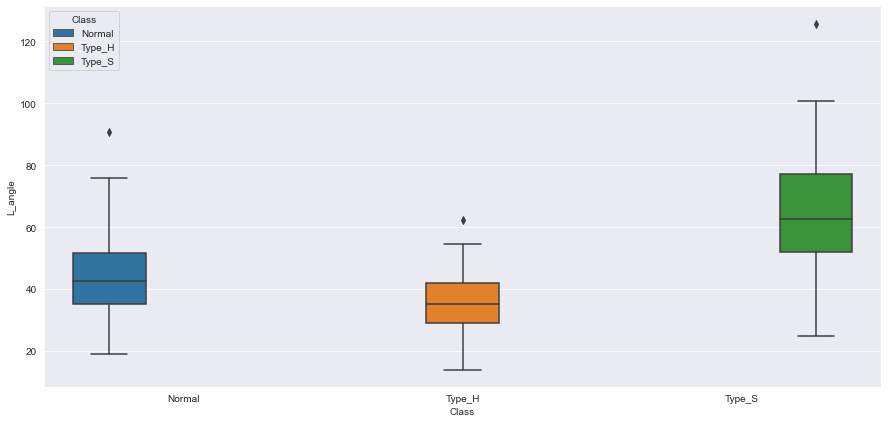

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='L_angle', data= df,hue='Class')
plt.show()

> **L_Angle has higher value for Type_S Class**

>**We can see Normal class has higher values compared to type_H class**

> **Each class contains one outlier**

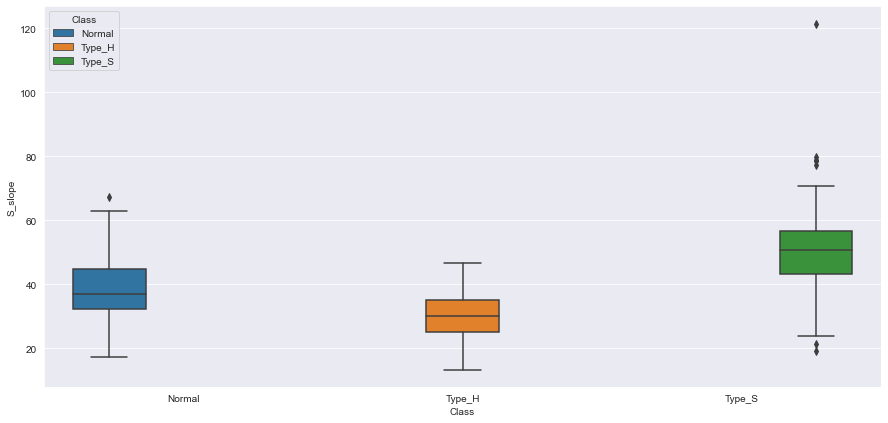

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_slope', data= df,hue='Class')
plt.show()

> **S_slope has huge values for Type_S class**

>**Normal class has high s_slope compared to Type_H**

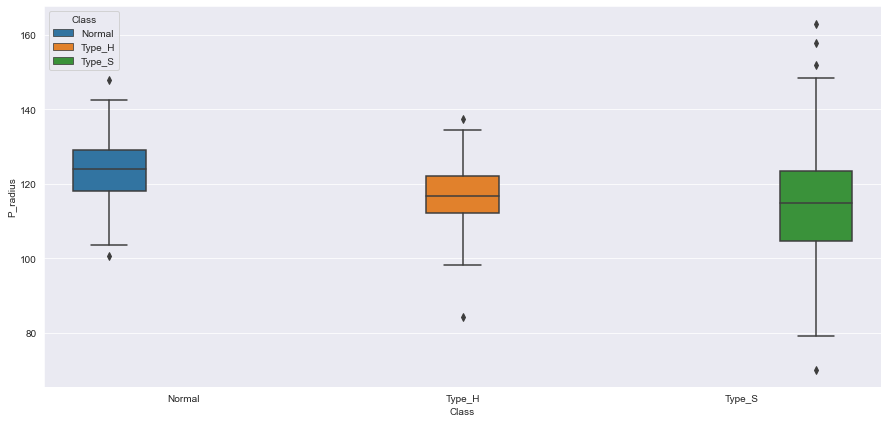

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_radius', data= df,hue='Class')

plt.show()

> **We can see P_radius value is more for Normal Class**

> **There is some extreme values for Type_s class**

> **All classes has higher and lower Value**

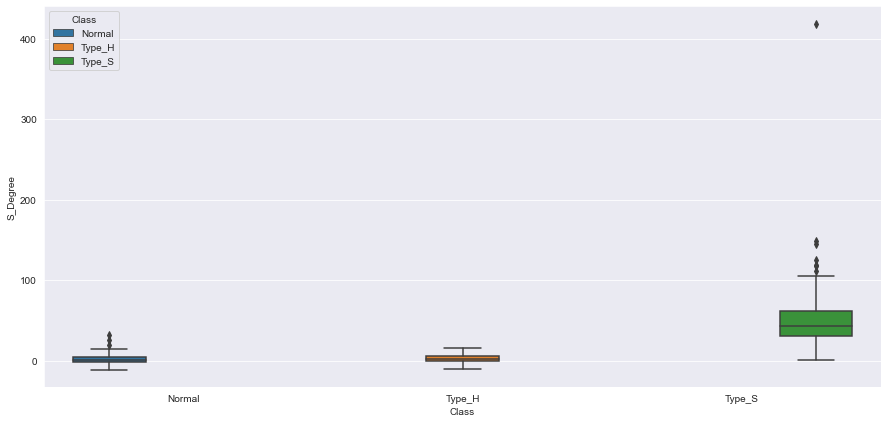

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df,hue='Class')
plt.show()

> **S_Degree has extreme values for type_S Class**

>**Few Normal class also has huge values for S_Degree**

In [34]:
class_summary=df.groupby('Class') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
1,Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
2,Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


# **Hypotesis Testing**

# Is the distribution of independent variables across normal,type_H and type_s, the same?

**Here we are using one-way anova to do statistical test.**

In [35]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    print('{} Ho: Class types does not affect the {}'.format('\033[1m',i))
    print('\n')
    print('{} H1: Class types affect the {}'.format('\033[1m',i))
    print('\n')
    
    df_normal=df[df.Class=='Normal'][i]
    df_typeH=df[df.Class=='Type_H'][i]
    df_typeS=df[df.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[1m',f_stats))
    print('{} p_value: {}'.format('\033[1m',p_value))
    
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Class types has efect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 Ho: Class types does not affect the P_incidence


 H1: Class types affect the P_incidence


 F_stats: 98.53970917437489
 p_value: 8.752848964938295e-34
 Rejecting Null Hypothesis.Class types has efect on P_incidence


 Ho: Class types does not affect the P_tilt


 H1: Class types affect the P_tilt


 F_stats: 21.29919432898912
 p_value: 2.176879152985521e-09
 Rejecting Null Hypothesis.Class types has efect on P_tilt


 Ho: Class types does not affect the L_angle


 H1: Class types affect the L_angle


 F_stats: 114.98284047330316
 p_value: 5.357329394004833e-38
 Rejecting Null Hypothesis.Class types has efect on L_angle


 Ho: Class types does not affect the S_slope


 H1: Class types affect the S_slope


 F_stats: 89.64395329777523
 p_value: 2.175670364983569e-31
 Rejecting Null Hypothesis.Class types has efect on S_slope


 Ho: Class types does not affect the P_radius


 H1: Class types affect the P_radius


 F_stats: 16.86693475538487
 p_value: 1.1219959042394205e-07
 Rejecting Nul

# **Outlier Analysis**

**As we have seen in our EDA we have very less outliers which needs to be handled**

**We are imputing outiers with mean**

In [36]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




# **Encoding Target Variable**

In [37]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

**Normal: 0**

**Type_H: 1**

**Type_S: 2**

# **Checking on Target Imbalance**

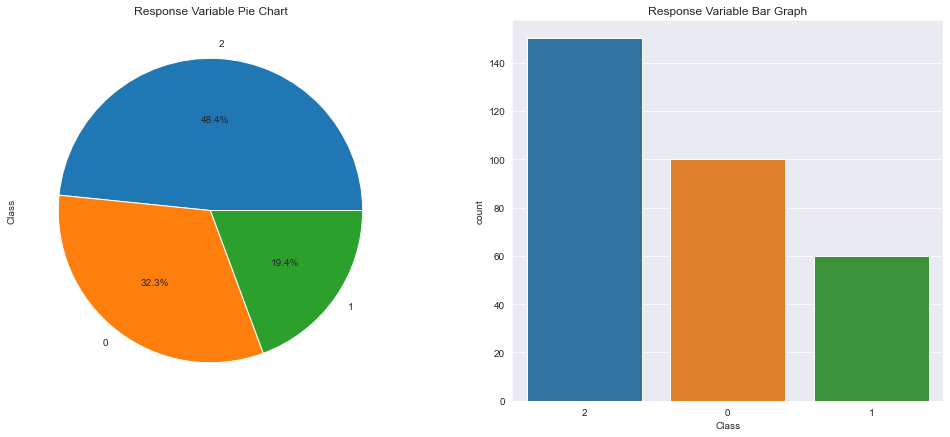

In [38]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],explode=(0,0,0))
sns.countplot('Class',data=df,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**We have imbalanced target variable**

**Every class is not equally distributed.**

**48% of data is occupied by Type_S**

**When you have imbalance dataset model does not learn about less distributed classes. This gives
poor performance in unseen data**

# Train - Test Split

In [39]:
X=df.drop(columns='Class')
y=df['Class'] #target

In [40]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705426,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


# **Scaling Independent Variables**

In [41]:
X_Scaled=X.apply(zscore)

In [42]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-6.159947e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,5.241663e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,1.876635e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-2.438909e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-8.022257e-16,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-1.130816e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


> **We have scaled independent variables to corresponding z-score.**

> **We can see Mean becomes close to zero and Standard Deviation becomes 1**

In [393]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **KNN Classifier**

In [394]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [395]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [396]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8629032258064516
Accuracy on Test data: 0.8387096774193549


> **Training Acuracy is 0.86 and Testing Accuracy is 0.83 Performance is less in test data.**

> **This is due to overfitting of data**

classification  Matrix:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.62      0.80      0.70        10
           2       0.96      0.90      0.93        30

    accuracy                           0.84        62
   macro avg       0.80      0.82      0.81        62
weighted avg       0.85      0.84      0.84        62



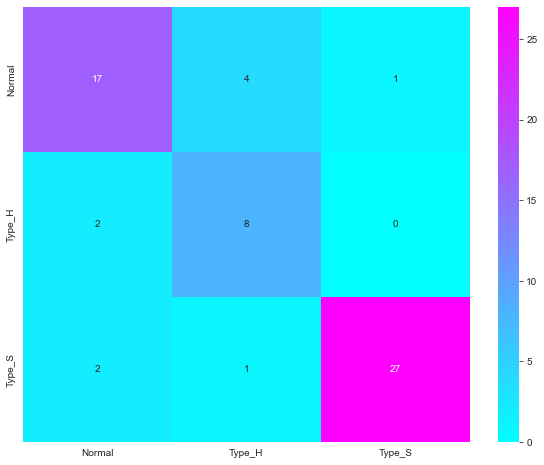

In [428]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='cool')
plt.show()


> **Our model predicts Type_S correctly most of the time. Only three misclassification on this class**

> **Misclassification of labels are more when predicting normal class**

> **Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly**

> **Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly**

> **class 0 predicted correctly for 81% of time. similary for class 1 62% and class 2 96%**

> **By F1 score we can say that precison and recall is balanced for class 0 by 79% and for class 1 by 70 %**

> **We have maximum F1 score for class 2.**

# **Finding best K value**

In [411]:
# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [412]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train, y_train)
    # predict the response
    y_predictKNN = KNN.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  21


Accuracy Score of Training Data:  0.8266129032258065

Accuracy Score of Test Data:  0.9032258064516129

Classification Report of KNN Model:
                precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.80      0.80      0.80        10
           2       0.97      0.97      0.97        30

    accuracy                           0.90        62
   macro avg       0.88      0.88      0.88        62
weighted avg       0.90      0.90      0.90        62


Mean Absolute Error of KNN:
 0.12903225806451613

Confusion Matrix of KNN:
 [[19  2  1]
 [ 2  8  0]
 [ 1  0 29]]


<AxesSubplot:>

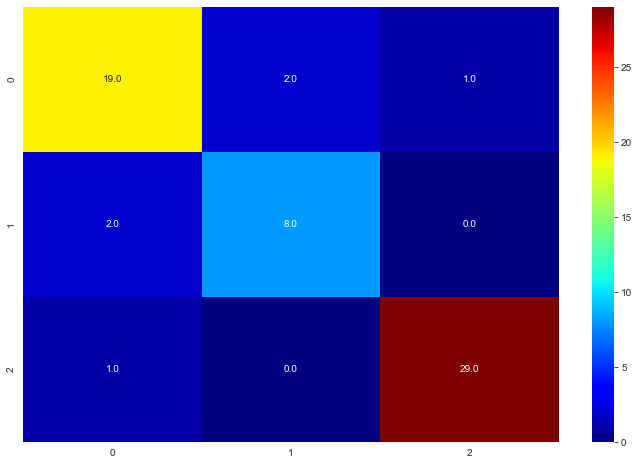

In [426]:
#Using optimal_k from above as the final model for prediction
KNN_MODEL = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
KNN_MODEL.fit(X_train, y_train)

# predict the response
y_predictKNN = KNN_MODEL.predict(X_test)

# evaluate accuracy
print('Accuracy Score of Training Data: ', KNN_MODEL.score(X_train, y_train))
KNN_MODEL_score = accuracy_score(y_test,y_predictKNN)

cfm_KNN = confusion_matrix(y_test, y_predictKNN)
print('\nAccuracy Score of Test Data: ', KNN_MODEL_score)
print('\nClassification Report of KNN Model:\n ', classification_report(y_test, y_predictKNN))
print('\nMean Absolute Error of KNN:\n', mean_absolute_error(y_test, y_predictKNN))
print('\nConfusion Matrix of KNN:\n', cfm_KNN)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_KNN, annot = True, cmap = 'jet', fmt = '.1f')

# K-Fold CV for finding best model

In [415]:
KNN_model=KNeighborsClassifier(n_neighbors=optimal_k)
LR_model=LogisticRegression()
GN_model=GaussianNB()

KNN: 0.832258 (0.055499)
LR: 0.816129 (0.079082)
NB: 0.816129 (0.038304)


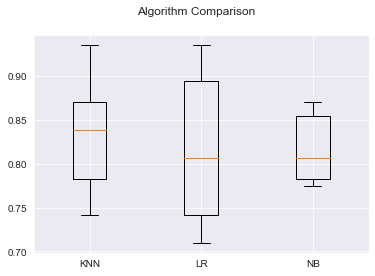

In [419]:
seed = 7
# prepare models
models = []
models.append(('KNN', KNN_model))
models.append(('LR', LR_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> **Accuracy is more for KNN,However the standard deviation is less for NB model.**

**We will check with scaled values to see whether there is improvement in model**

LR: 0.854839 (0.076677)
KNN: 0.803226 (0.060263)
NB: 0.816129 (0.038304)


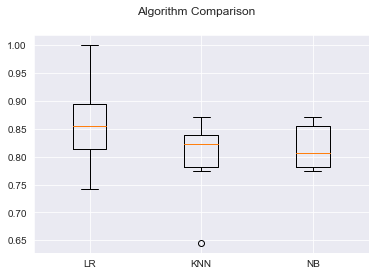

In [420]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**When the scaled values are used instead of normal values Logistic regression is performing well.**

**Logistic Regression gives 85% accuracy with little standard deviation.**

# **6.Conclusion and improvisation:**

> **All the variables has significant effect on target class**

> **class belongs to type_s has higher mean value for alomst all variables**

> **Class belongs to normal has lower values for all variables**

> **For almost all variables the distribution is normal**

> **For Knn, k=21 we are getting balanced train and test error**

> **We can use KNN as a final model because of balanced train and test error also the recall and precision values are good**

> **Clear description on each variables may help to understand problem statement better because of medical domain**

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)